# Data Loading

In the first step, we load the required data for our analysis. We read the electric vehicle population data and the census median income data from their respective CSV files.

In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
EV_data = '/content/drive/MyDrive/Universität Wien/Master Digital Humanities/WS24_25/Doing Data Science/Project/code/EV-data.csv'

census_data = '/content/drive/MyDrive/Universität Wien/Master Digital Humanities/WS24_25/Doing Data Science/Project/code/census-data.csv'

In [ ]:
electric_vehicle_population = pd.read_csv(EV_data)
census_median_income = pd.read_csv(census_data)

# Clean Vehicle Data

To simplify the column names for easier use in python, we will rename the columns to lowercase and replace spaces with underscores. We will also remove the four rows where the "model" column contains NA values. Additionally, we will create a new column, "vehicle," by combining the "year," "make," and "model" fields.

In [ ]:
electric_vehicle_population.columns = electric_vehicle_population.columns.str.lower().str.replace(' ', '_')

electric_vehicle_population_clean = electric_vehicle_population.dropna(subset=['model'])

electric_vehicle_population_clean['vehicle'] = electric_vehicle_population_clean['model_year'].astype(str) + ' ' + electric_vehicle_population_clean['make'] + ' ' + electric_vehicle_population_clean['model']
electric_vehicle_population_clean['postal_code'] = electric_vehicle_population_clean['postal_code'].fillna(0).astype(int).astype(str)
electric_vehicle_population_clean.head()

,vin_(1-10),county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract,vehicle
0,1N4AZ0CP8D,King,Shoreline,WA,98177,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,32.0,125450447,POINT (-122.36498 47.72238),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10,2013 NISSAN LEAF
1,5YJSA1E45K,King,Seattle,WA,98112,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,43.0,101662900,POINT (-122.30207 47.64085),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,2019 TESLA MODEL S
2,WVGUNPE28M,Kitsap,Olalla,WA,98359,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,272118717,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10,2021 VOLKSWAGEN ID.4
3,JTDKARFP6H,Thurston,Olympia,WA,98501,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,22.0,349372929,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10,2017 TOYOTA PRIUS PRIME
4,1FADP5CU9G,Thurston,Olympia,WA,98506,2016,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,22.0,171625653,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,5.306701e+10,2016 FORD C-MAX


# Clean Income Data
We are interested in the column `S1903_C03_001E`. To focus on zip codes and income data, we’ll clean the table by extracting zip codes, which are strings starting with “ZCTA5,” and removing the prefix to isolate the zip codes. This will leave us with a simplified table containing two columns: `zip_code` and `median_household_income`. Rows with missing income data are marked with “-”, so we’ll filter those out.

In [ ]:
census_median_income.head()

,GEO_ID,NAME,S1903_C01_001E,S1903_C01_001M,S1903_C01_002E,S1903_C01_002M,S1903_C01_003E,S1903_C01_003M,S1903_C01_004E,S1903_C01_004M,...,S1903_C03_036M,S1903_C03_037E,S1903_C03_037M,S1903_C03_038E,S1903_C03_038M,S1903_C03_039E,S1903_C03_039M,S1903_C03_040E,S1903_C03_040M,Unnamed: 242
0,Geography,Geographic Area Name,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,NaN
1,8600000US98001,ZCTA5 98001,11648,558,7681,506,716,198,183,100,...,7519,135112,33727,58490,13059,47045,17376,69176,3830,NaN
2,8600000US98002,ZCTA5 98002,13162,583,8812,611,1071,289,299,140,...,4679,70682,15215,39757,7832,33634,2709,81544,27741,NaN
3,8600000US98003,ZCTA5 98003,18515,823,10454,663,2887,553,114,68,...,6290,81797,15871,37839,9764,29226,3739,95114,33065,NaN
4,8600000US98004,ZCTA5 98004,17460,660,10494,616,372,187,26,39,...,11161,131719,34582,118875,15335,117807,17404,119841,48138,NaN


In [ ]:
census_median_income_clean = census_median_income.iloc[1:].copy()
census_median_income_clean = census_median_income_clean[['NAME', 'S1903_C03_001E']]
census_median_income_clean = census_median_income_clean.rename(columns={'S1903_C03_001E': 'median_household_income'})
census_median_income_clean = census_median_income_clean.dropna(subset=['median_household_income'])

# Extract zip codes and clean data
census_median_income_clean['zip_code'] = census_median_income_clean['NAME'].str.split(' ').str[-1]
census_median_income_clean = census_median_income_clean[['zip_code', 'median_household_income']]

# Filter out rows with missing income data
census_median_income_clean = census_median_income_clean[census_median_income_clean['median_household_income'] != '-']

census_median_income_clean.head()

,zip_code,median_household_income
1,98001,88962
2,98002,59097
3,98003,59560
4,98004,142173
5,98005,135225


##New Code
*   create excel with income data to use in the QGIS-project
*   create maps



In [ ]:
# add CODE

import os

# Get the notebook's directory and create the file path
notebook_path = os.path.abspath('')
excel_file_path = os.path.join(notebook_path, 'census_median_income_clean.xlsx')

# Save to Excel with error handling
try:
    census_median_income_clean.to_excel(excel_file_path, index=False)
    print(f"Data successfully saved to {excel_file_path}")
except Exception as e:
    print(f"Error saving data: {e}")


Data successfully saved to /content/census_median_income_clean.xlsx


In [ ]:
# Get the notebook's directory and create the file path
notebook_path = os.path.abspath('')
csv_file_path = os.path.join(notebook_path, 'CSV_census_median_income_clean.csv')

# Save to CSV with error handling
try:
    census_median_income_clean.to_csv(csv_file_path, index=False)
    print(f"Data successfully saved to {csv_file_path}")
except Exception as e:
    print(f"Error saving data: {e}")

Data successfully saved to /content/CSV_census_median_income_clean.csv


In [ ]:
MEDIAN_income_CSV = '/content/drive/MyDrive/Universität Wien/Master Digital Humanities/WS24_25/Doing Data Science/Project/code/CSV_census_median_income_clean.csv'
MEDIAN_income_CSV = pd.read_csv(MEDIAN_income_CSV)
MEDIAN_income_CSV.head()

,zip_code,median_household_income
0,98001,88962
1,98002,59097
2,98003,59560
3,98004,142173
4,98005,135225


#### VALUE COUNTS per zipcode in Washington State
* saved as csv

In [ ]:
#create value counts of cars per zipcode in WA, USA
value_counts = electric_vehicle_population_clean['postal_code'].value_counts()
value_counts.head(100)

,count
postal_code,
98052,5405
98012,4087
98033,3590
98006,3419
98004,3257
...,...
98030,747
98178,747
98070,741


In [ ]:
#ONLY WASHINGTON STATE vehicles ('WA' in column 'state')

# Filter the DataFrame to include only rows where the 'state' column is 'WA'
wa_electric_vehicles = electric_vehicle_population_clean[electric_vehicle_population_clean['state'] == 'WA']

# Now calculate the value counts for postal codes in Washington
value_counts_wa = wa_electric_vehicles['postal_code'].value_counts()

# Display the top values (e.g., top 100)
value_counts_wa.head()


# Save the filtered data (wa_electric_vehicles) to a CSV file
wa_electric_vehicles.to_csv('wa_electric_vehicles.csv', index=False)

In [ ]:
#VALUE COUNTS per zipcode in Washington

# Filter the DataFrame to include only rows where the 'state' column is 'WA'
wa_electric_vehicles = electric_vehicle_population_clean[electric_vehicle_population_clean['state'] == 'WA']

# Now calculate the value counts for postal codes in Washington
value_counts_wa = wa_electric_vehicles['postal_code'].value_counts()

# Create a DataFrame from value_counts_wa
value_counts_df = value_counts_wa.reset_index()
value_counts_df.columns = ['zip_code', 'vehicle_count']

# Save the value counts DataFrame to a CSV file
value_counts_df.to_csv('wa_vehicle_counts_per_zipcode.csv', index=False)

In [ ]:
num_rows = len(value_counts_wa)
print(f"Number of rows in the filtered data: {num_rows}")

Number of rows in the filtered data: 566


### Creating QGIS-data
* combine csv of median income with csv of vehicle count
* merge CSVs and if zip code is not available in the file of vehicle count file not available,
* but in the other file present add new record with that zipcode

In [ ]:

ZIPCODE_file_path = '/content/drive/MyDrive/Universität Wien/Master Digital Humanities/WS24_25/Doing Data Science/Project/code/wa_vehicle_counts_per_zipcode.csv'
MEDIAN_income_CSV = '/content/drive/MyDrive/Universität Wien/Master Digital Humanities/WS24_25/Doing Data Science/Project/code/CSV_census_median_income_clean.csv'


# Load the DataFrames
vehicle_counts_df = pd.read_csv(ZIPCODE_file_path)
median_income_df = pd.read_csv(MEDIAN_income_CSV)

# Convert 'zip_code' columns to strings for consistency
vehicle_counts_df['zip_code'] = vehicle_counts_df['zip_code'].astype(str)
median_income_df['zip_code'] = median_income_df['zip_code'].astype(str)

# Merge DataFrames using an outer join
combined_df = pd.merge(median_income_df, vehicle_counts_df, on='zip_code', how='outer')

# Fill NaN values with 0
combined_df = combined_df.fillna(0)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_data_NEW.csv', index=False)

print("Combined data saved.")

Combined data saved.


#### Population data

* add population data to 'combined_data_NEW.csv'


INFO: ROW 2 and 3 were deleted for better usability!



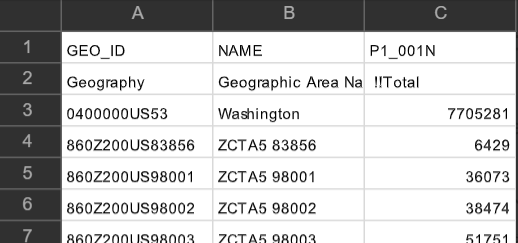

In [ ]:
from IPython.display import Image
image_path = '/content/drive/MyDrive/Universität Wien/Master Digital Humanities/WS24_25/Doing Data Science/Project/code/Screenshot 2025-01-16 195434.png'
print("\nINFO: ROW 2 and 3 were deleted for better usability!\n")
display(Image(image_path))


In [ ]:
population_data = '/content/drive/MyDrive/Universität Wien/Master Digital Humanities/WS24_25/Doing Data Science/Project/code/POPULATION_2020_data_edited.csv'

population_data_CSV = pd.read_csv(population_data)
population_data_CSV.head()

,GEO_ID,NAME,P1_001N
0,860Z200US83856,ZCTA5 83856,6429
1,860Z200US98001,ZCTA5 98001,36073
2,860Z200US98002,ZCTA5 98002,38474
3,860Z200US98003,ZCTA5 98003,51751
4,860Z200US98004,ZCTA5 98004,39136


In [ ]:
# drop column(0
# rename column "NAME" to "zip_code"
# clean entries of column "zip_code" --> remove "ZCTA5" with regular expressions

data = population_data_CSV

# Delete the first column
data = data.iloc[:, 1:]

# Rename the column 'NAME' to 'zip_code'
data.rename(columns={'NAME': 'zip_code'}, inplace=True)

# Normalize the zip_code column using regular expressions
data['zip_code'] = data['zip_code'].apply(lambda x: re.search(r'\d{5}', x).group() if re.search(r'\d{5}', x) else x)
# Save the modified CSV
data.to_csv('QGIS_data.csv', index=False)

In [ ]:
# calculate vehicle per person and create new column

combined_data_QGIS = '/content/drive/MyDrive/Universität Wien/Master Digital Humanities/WS24_25/Doing Data Science/Project/code/combined_data_NEW.csv'
combined_data_QGIS_1 = pd.read_csv(combined_data_QGIS)
combined_data_QGIS_1.head()

,zip_code,median_household_income,vehicle_count
0,98001,88962.0,930.0
1,98002,59097.0,355.0
2,98003,59560.0,722.0
3,98004,142173.0,3257.0
4,98005,135225.0,1597.0


In [ ]:
population_CLEANED_data = '/content/drive/MyDrive/Universität Wien/Master Digital Humanities/WS24_25/Doing Data Science/Project/code/WA_population_data_CLEANED.csv'
population_CLEANED = pd.read_csv(population_CLEANED_data)
population_CLEANED.head()

,zip_code,P1_001N
0,83856,6429
1,98001,36073
2,98002,38474
3,98003,51751
4,98004,39136


In [ ]:
# add 'P1_001N'-data to corresponding zipcode of combined_data_QGIS_1['zip_code']

In [ ]:
# Assuming you have already loaded the DataFrames:
# combined_data_QGIS_1
# population_CLEANED

# Rename the 'zip_code' column in population_CLEANED to match combined_data_QGIS_1
population_CLEANED.rename(columns={'zip_code': 'zip_code_pop'}, inplace=True)

# Merge the two DataFrames based on 'zip_code' and 'zip_code_pop'
combined_data_QGIS_1 = pd.merge(combined_data_QGIS_1, population_CLEANED[['zip_code_pop', 'P1_001N']], left_on='zip_code', right_on='zip_code_pop', how='left')

# Drop the temporary 'zip_code_pop' column
combined_data_QGIS_1.drop(columns=['zip_code_pop'], inplace=True)

# Now, combined_data_QGIS_1 will have a new column 'P1_001N' with the population data
# for the matching zip codes.
combined_data_QGIS_1.to_csv('zip_income_vehicle_WApopulation.csv', index=False)

combined_data_QGIS_1.head()

,zip_code,median_household_income,vehicle_count,P1_001N
0,98001,88962.0,930.0,36073.0
1,98002,59097.0,355.0,38474.0
2,98003,59560.0,722.0,51751.0
3,98004,142173.0,3257.0,39136.0
4,98005,135225.0,1597.0,20961.0


In [ ]:
# create new column with "vehicle per population"-count (vehicle_count / P1_001N)

combined_data_QGIS_1['vehicle_per_person'] = combined_data_QGIS_1['vehicle_count'] / combined_data_QGIS_1['P1_001N']
combined_data_QGIS_1.to_csv('qgis_data_FINAL_version.csv', index=False)
combined_data_QGIS_1.head()

,zip_code,median_household_income,vehicle_count,P1_001N,vehicle_per_person
0,98001,88962.0,930.0,36073.0,0.025781
1,98002,59097.0,355.0,38474.0,0.009227
2,98003,59560.0,722.0,51751.0,0.013951
3,98004,142173.0,3257.0,39136.0,0.083223
4,98005,135225.0,1597.0,20961.0,0.076189


In [ ]:
# Fill NULL values with 0 in both columns before division
combined_data_QGIS_1['vehicle_count'] = combined_data_QGIS_1['vehicle_count'].fillna(0)
combined_data_QGIS_1['P1_001N'] = combined_data_QGIS_1['P1_001N'].fillna(0)

# Create new column with "vehicle per population"-count
combined_data_QGIS_1['vehicle_per_person'] = combined_data_QGIS_1['vehicle_count'] / combined_data_QGIS_1['P1_001N']

# Replace any resulting NaN from division by zero with 0
combined_data_QGIS_1['vehicle_per_person'] = combined_data_QGIS_1['vehicle_per_person'].fillna(0)

combined_data_QGIS_1.to_csv('qgis_data_FINAL_version.csv', index=False)
combined_data_QGIS_1.head()


,zip_code,median_household_income,vehicle_count,P1_001N,vehicle_per_person
0,98001,88962.0,930.0,36073.0,0.025781
1,98002,59097.0,355.0,38474.0,0.009227
2,98003,59560.0,722.0,51751.0,0.013951
3,98004,142173.0,3257.0,39136.0,0.083223
4,98005,135225.0,1597.0,20961.0,0.076189


In [ ]:
# Fill NULL values with 0 and ensure float type
combined_data_QGIS_1['vehicle_count'] = combined_data_QGIS_1['vehicle_count'].fillna(0).astype(float)
combined_data_QGIS_1['P1_001N'] = combined_data_QGIS_1['P1_001N'].fillna(0).astype(float)

# Create new column with "vehicle per population"-count
# Using numpy where to handle division by zero
import numpy as np
combined_data_QGIS_1['vehicle_per_person'] = np.where(
    combined_data_QGIS_1['P1_001N'] == 0,
    0,
    combined_data_QGIS_1['vehicle_count'] / combined_data_QGIS_1['P1_001N']
)

# Print the specific row to check the calculation
print(combined_data_QGIS_1[combined_data_QGIS_1['vehicle_count'] == 26.0])

combined_data_QGIS_1.to_csv('qgis_data_FINAL_version.csv', index=False)
combined_data_QGIS_1.head()



     zip_code  median_household_income  vehicle_count  P1_001N  \
165     98315                  66736.0           26.0   5482.0   
190     98351                  51109.0           26.0   1330.0   
198     98361                  41763.0           26.0   1000.0   
404     98844                  43306.0           26.0   4599.0   
483     99109                  50953.0           26.0   5016.0   

     vehicle_per_person  
165            0.004743  
190            0.019549  
198            0.026000  
404            0.005653  
483            0.005183  


,zip_code,median_household_income,vehicle_count,P1_001N,vehicle_per_person
0,98001,88962.0,930.0,36073.0,0.025781
1,98002,59097.0,355.0,38474.0,0.009227
2,98003,59560.0,722.0,51751.0,0.013951
3,98004,142173.0,3257.0,39136.0,0.083223
4,98005,135225.0,1597.0,20961.0,0.076189


# Investigate Correlation Between Electric Range and Suggested Price

In the next section, we aim to investigate whether there is a correlation between the electric range of vehicles and their suggested price (base MSRP). This analysis will help us understand if vehicles with a higher electric range tend to have a higher suggested price.

In [ ]:
electric_vehicle_msrp = electric_vehicle_population_clean[electric_vehicle_population_clean['base_msrp'] > 0]

# Remove duplicates based on the 'vehicle' column and select the required columns
electric_vehicle_msrp = electric_vehicle_msrp.drop_duplicates(subset='vehicle')[['vehicle', 'base_msrp', 'electric_range', 'model_year', 'make', 'model']]

electric_vehicle_msrp.head()

,vehicle,base_msrp,electric_range,model_year,make,model
52,2017 BMW 330E,44100.0,14.0,2017,BMW,330E
66,2016 KIA SOUL,31950.0,93.0,2016,KIA,SOUL
132,2014 TESLA MODEL S,69900.0,208.0,2014,TESLA,MODEL S
175,2019 BMW 530E,53400.0,16.0,2019,BMW,530E
252,2012 TESLA MODEL S,59900.0,265.0,2012,TESLA,MODEL S


In [ ]:
Q1 = electric_vehicle_msrp['base_msrp'].quantile(0.25)
Q3 = electric_vehicle_msrp['base_msrp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = electric_vehicle_msrp[(electric_vehicle_msrp['base_msrp'] < lower_bound) | (electric_vehicle_msrp['base_msrp'] > upper_bound)]

outliers

,vehicle,base_msrp,electric_range,model_year,make,model
9171,2018 PORSCHE PANAMERA,184400.0,14.0,2018,PORSCHE,PANAMERA
43783,2015 PORSCHE 918,845000.0,12.0,2015,PORSCHE,918


In [ ]:
# we remove the Porsche 918 from the dataset
electric_vehicle_population_clean = electric_vehicle_population_clean[electric_vehicle_population_clean['model'] != '918']
electric_vehicle_msrp = electric_vehicle_msrp[electric_vehicle_msrp['model'] != '918']

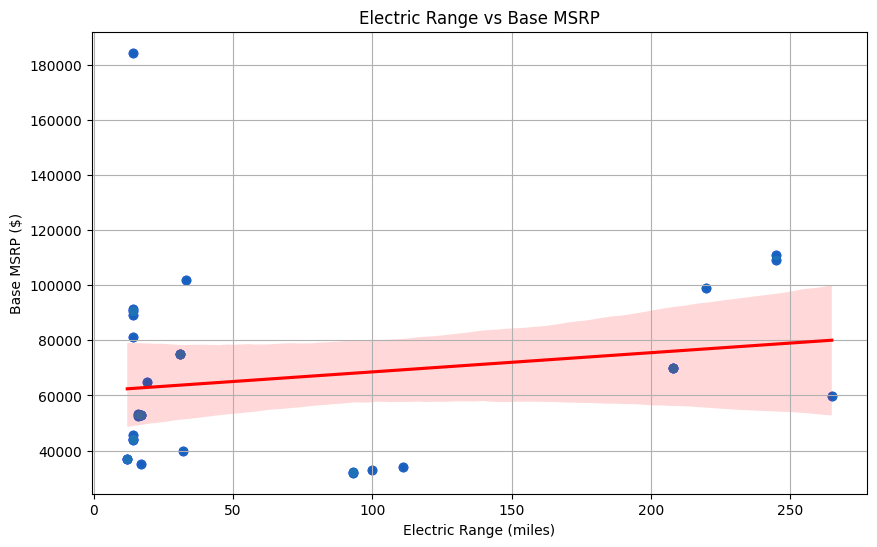

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


slope, intercept, r_value, p_value, std_err = stats.linregress(electric_vehicle_msrp['electric_range'], electric_vehicle_msrp['base_msrp'])

plt.figure(figsize=(10, 6))
plt.scatter(electric_vehicle_msrp['electric_range'], electric_vehicle_msrp['base_msrp'], color='blue')
sns.regplot(x='electric_range', y='base_msrp', data=electric_vehicle_msrp, line_kws={'color': 'red'})
plt.title('Electric Range vs Base MSRP')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.grid(True)
plt.show()

In [ ]:
print(f"Regression statistics for Electric Range vs Base MSRP:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared value: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

Regression statistics for Electric Range vs Base MSRP:
Slope: 69.70768704629009
Intercept: 61576.478326311255
R-squared value: 0.03275763064515511
P-value: 0.3384965206180618
Standard error: 71.58352363136564


# Investigate Factors Influencing Units Sold

To understand what factors influence the number of units sold, we will create a new dataset that aggregates the total units sold per vehicle model. This will allow us to analyze the relationship between various attributes (such as electric range, base MSRP, and model year) and the total units sold for each model.

In [ ]:
electric_vehicle_population_clean['base_msrp'] = electric_vehicle_population_clean['base_msrp'].replace(0, np.nan)
electric_vehicle_population_clean['electric_range'] = electric_vehicle_population_clean['electric_range'].replace(0, np.nan)

# Group by vehicle, electric_range, and base_msrp and count the number of vehicles
electric_vehicle_count = electric_vehicle_population_clean.groupby(['vehicle']).size().reset_index(name='vehicle_n')
electric_vehicle_count = electric_vehicle_count.sort_values(by='vehicle_n', ascending=False)
electric_vehicle_count = electric_vehicle_count.reset_index(drop=True)

electric_range_count = electric_vehicle_population_clean.groupby(['electric_range']).size().reset_index(name='vehicle_n')
electric_range_count = electric_range_count.sort_values(by='vehicle_n', ascending=False)
electric_range_count = electric_range_count.reset_index(drop=True)
electric_range_count.head()

electric_msrp_count = electric_vehicle_population_clean.groupby(['base_msrp']).size().reset_index(name='vehicle_n')
electric_msrp_count = electric_msrp_count.sort_values(by='vehicle_n', ascending=False)
electric_msrp_count = electric_msrp_count.reset_index(drop=True)
electric_msrp_count.head()

,base_msrp,vehicle_n
0,69900.0,1340
1,31950.0,363
2,52900.0,222
3,32250.0,142
4,59900.0,128


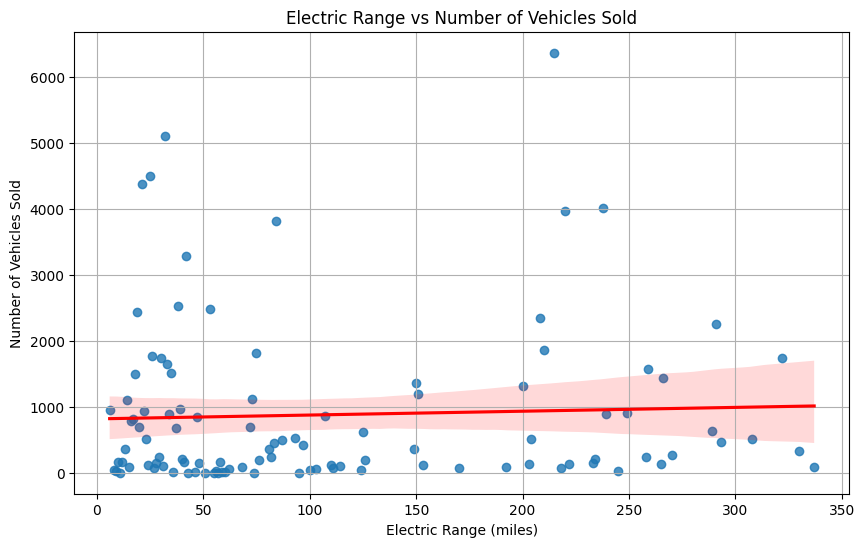

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(electric_range_count['electric_range'], electric_range_count['vehicle_n'])

plt.figure(figsize=(10, 6))
sns.regplot(x='electric_range', y='vehicle_n', data=electric_range_count, line_kws={'color': 'red'})
plt.title('Electric Range vs Number of Vehicles Sold')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles Sold')
plt.grid(True)
plt.show()

In [ ]:
print(f"Regression statistics for Electric Range vs Number of Vehicles Sold:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared value: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")


Regression statistics for Electric Range vs Number of Vehicles Sold:
Slope: 0.5810038186519892
Intercept: 818.6073236418906
R-squared value: 0.0019765423903862927
P-value: 0.6524712733404534
Standard error: 1.2864048906543668


In [ ]:
from scipy.stats import kendalltau

range_cor, p_value = kendalltau(electric_range_count['electric_range'], electric_range_count['vehicle_n'])

print(f"Kendall correlation coefficient: {range_cor}")
print(f"P-value: {p_value}")

Kendall correlation coefficient: 0.03518417244161411
P-value: 0.5949759726373887


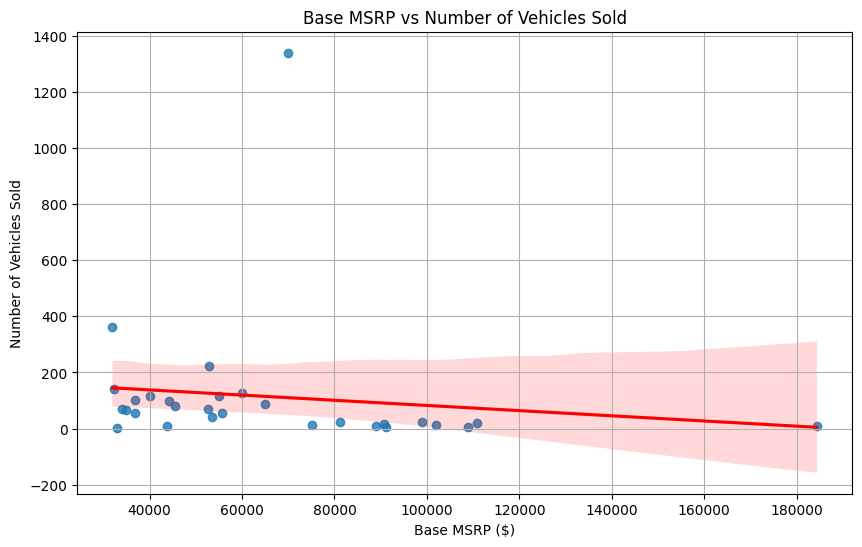

In [ ]:
slope_msrp, intercept_msrp, r_value_msrp, p_value_msrp, std_err_msrp = stats.linregress(electric_msrp_count['base_msrp'], electric_msrp_count['vehicle_n'])

plt.figure(figsize=(10, 6))
sns.regplot(x='base_msrp', y='vehicle_n', data=electric_msrp_count, line_kws={'color': 'red'})
plt.title('Base MSRP vs Number of Vehicles Sold')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Number of Vehicles Sold')
plt.grid(True)
plt.show()

In [ ]:
print("\nRegression statistics for Base MSRP vs Number of Vehicles Sold:")
print(f"Slope: {slope_msrp}")
print(f"Intercept: {intercept_msrp}")
print(f"R-squared value: {r_value_msrp**2}")
print(f"P-value: {p_value_msrp}")
print(f"Standard error: {std_err_msrp}")


Regression statistics for Base MSRP vs Number of Vehicles Sold:
Slope: -0.000923030343163447
Intercept: 174.79682584092396
R-squared value: 0.01597598667397154
P-value: 0.5135294751786713
Standard error: 0.0013941294436739067


In [ ]:
msrp_cor, p_value_msrp = kendalltau(electric_msrp_count['base_msrp'], electric_msrp_count['vehicle_n'])

print(f"Kendall correlation coefficient: {msrp_cor}")
print(f"P-value: {p_value_msrp}")

Kendall correlation coefficient: -0.35555663940613114
P-value: 0.006890057981447854


## Census Data

In the next step, we combine the EV and census datasets to investigate if there are differences between high and low income regions and how many EVs are sold there.

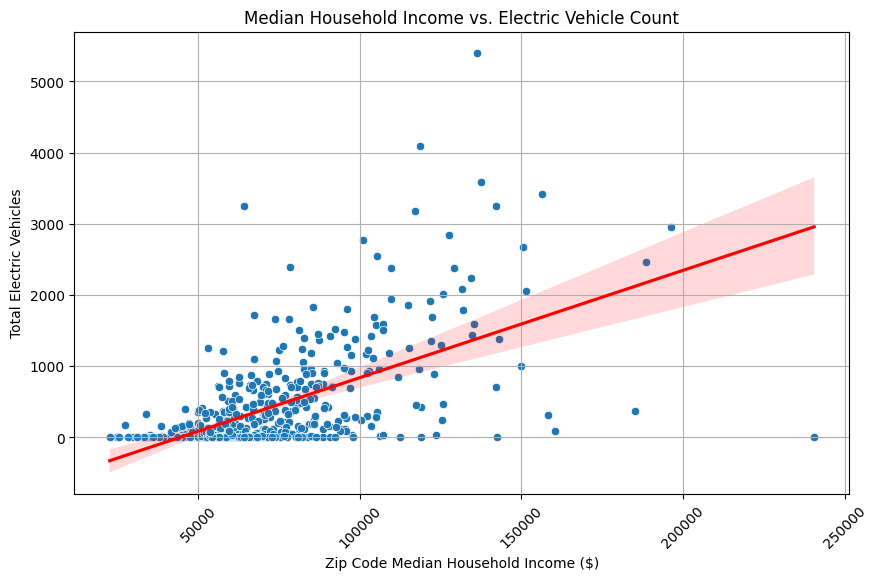

In [ ]:
electric_vehicle_population_clean['postal_code'] = electric_vehicle_population_clean['postal_code'].astype(str)
census_median_income_clean['zip_code'] = census_median_income_clean['zip_code'].astype(str)

# Merge the dataframes on zip code
electric_vehicle_byzip = pd.merge(electric_vehicle_population_clean, census_median_income_clean, left_on='postal_code', right_on='zip_code')

# Group by postal code and median household income, and count the number of vehicles per zip code
electric_vehicle_byzip_grouped = electric_vehicle_byzip.groupby(['postal_code', 'median_household_income']).size().reset_index(name='vehicle_n')

# Convert median household income to numeric
electric_vehicle_byzip_grouped['median_household_income_num'] = pd.to_numeric(electric_vehicle_byzip_grouped['median_household_income'])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_household_income_num', y='vehicle_n', data=electric_vehicle_byzip_grouped)
sns.regplot(x='median_household_income_num', y='vehicle_n', data=electric_vehicle_byzip_grouped, scatter=False, color='red')
plt.title('Median Household Income vs. Electric Vehicle Count')
plt.xlabel('Zip Code Median Household Income ($)')
plt.ylabel('Total Electric Vehicles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
slope_income, intercept_income, r_value_income, p_value_income, std_err_income = stats.linregress(electric_vehicle_byzip_grouped['median_household_income_num'], electric_vehicle_byzip_grouped['vehicle_n'])

print("Regression statistics for Median Household Income vs Electric Vehicle Count:")
print(f"Slope: {slope_income}")
print(f"Intercept: {intercept_income}")
print(f"R-squared value: {r_value_income**2}")
print(f"P-value: {p_value_income}")
print(f"Standard error: {std_err_income}")

Regression statistics for Median Household Income vs Electric Vehicle Count:
Slope: 0.015073767972766971
Intercept: -668.0206758404747
R-squared value: 0.3603393713249907
P-value: 2.0455517817419364e-52
Standard error: 0.000880722529819571


In [ ]:
#ERROR FIX
# Convert problematic columns to numeric. This will turn non-convertible values into NaN.
electric_vehicle_byzip["base_msrp"] = pd.to_numeric(electric_vehicle_byzip["base_msrp"], errors="coerce")
electric_vehicle_byzip["electric_range"] = pd.to_numeric(electric_vehicle_byzip["electric_range"], errors="coerce")
electric_vehicle_byzip["median_household_income"] = pd.to_numeric(electric_vehicle_byzip["median_household_income"], errors="coerce")


In [ ]:
vehicle_income_count = electric_vehicle_byzip.groupby('vehicle').agg(
    vehicle_n=('vehicle', 'size'),
    electric_vehicle_type=('electric_vehicle_type', 'first'),
    clean_alternative_fuel_vehicle_cafv_eligibility=('clean_alternative_fuel_vehicle_(cafv)_eligibility', 'first'),
    base_msrp=('base_msrp', 'median'),
    electric_range=('electric_range', 'median'),
    median_household_income=('median_household_income', 'median')
).reset_index()

vehicle_income_count['base_msrp'] = vehicle_income_count['base_msrp'].fillna(vehicle_income_count['base_msrp'].mean())
vehicle_income_count['electric_range'] = vehicle_income_count['electric_range'].fillna(vehicle_income_count['electric_range'].mean())

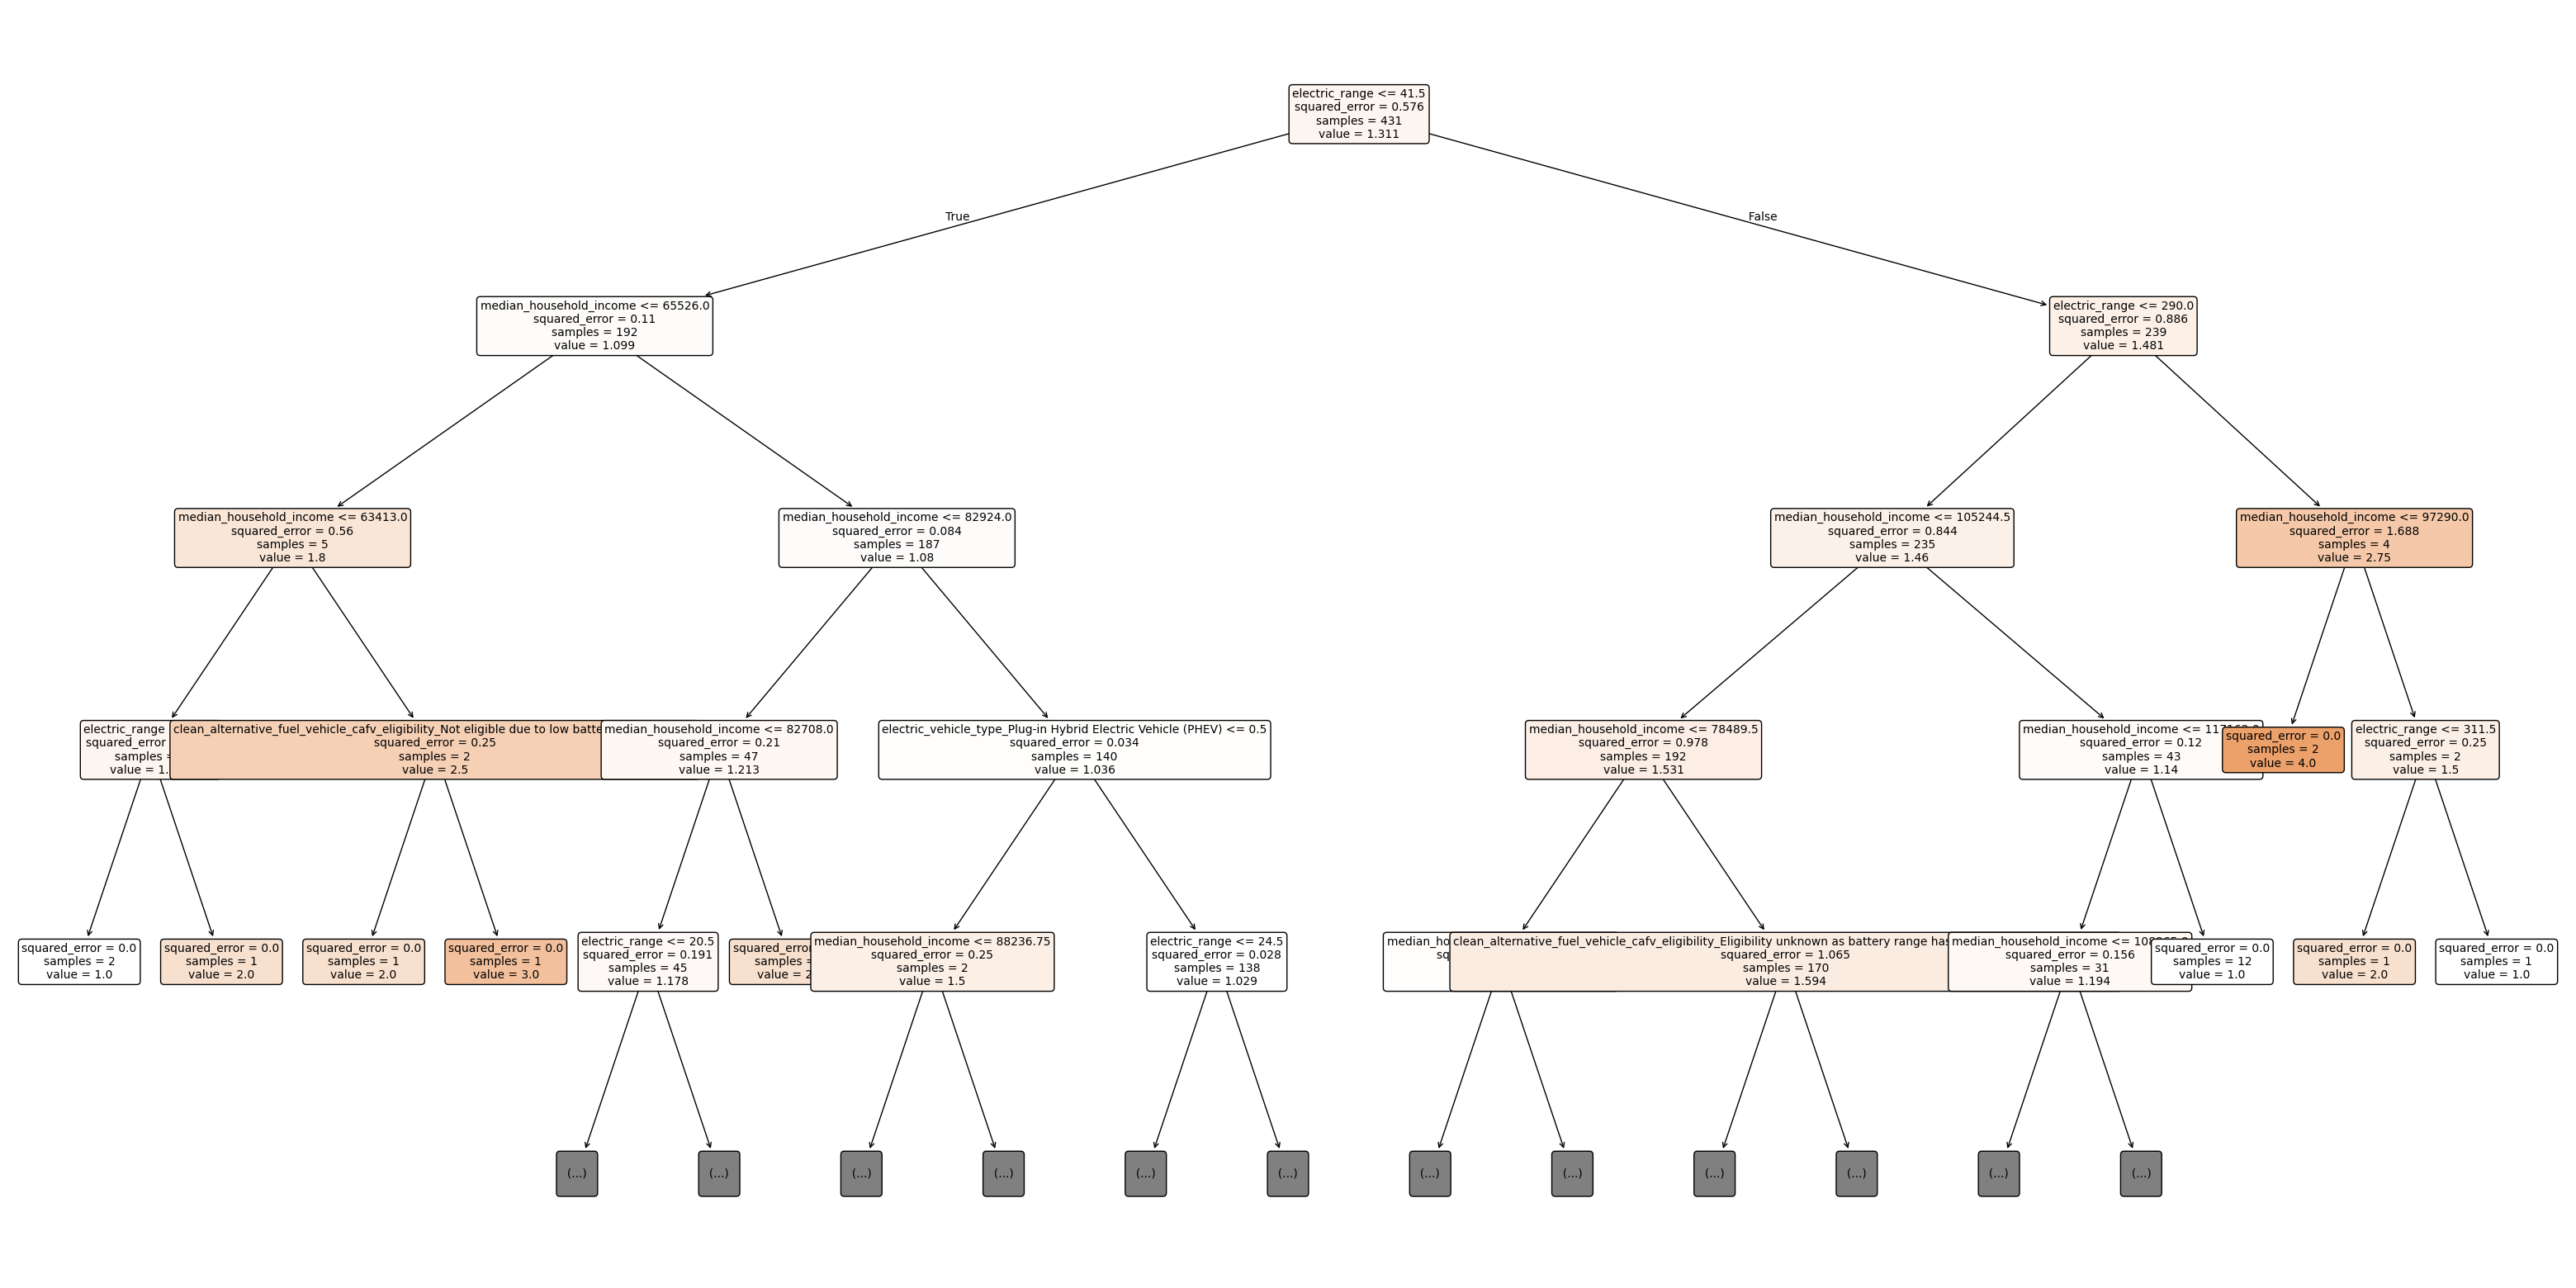

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create buckets for vehicle_count
bins = [0, 500, 1000, 2000, 5000, 10000, 20000]
labels = [1, 2, 3, 4, 5, 6]
vehicle_income_count['vehicle_count_bucket'] = pd.cut(vehicle_income_count['vehicle_n'], bins=bins, labels=labels, include_lowest=True)

# Prepare the data
X = vehicle_income_count.drop(columns=['vehicle', 'vehicle_n', 'vehicle_count_bucket'])
y = vehicle_income_count['vehicle_count_bucket']

# Convert categorical columns to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression tree
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)


# Improve plot readability
plt.figure(figsize=(40, 20))
plot_tree(regressor, feature_names=X.columns, filled=True, rounded=True, fontsize=10, max_depth=4)
plt.show()


---
# **ADDED** Decision trees



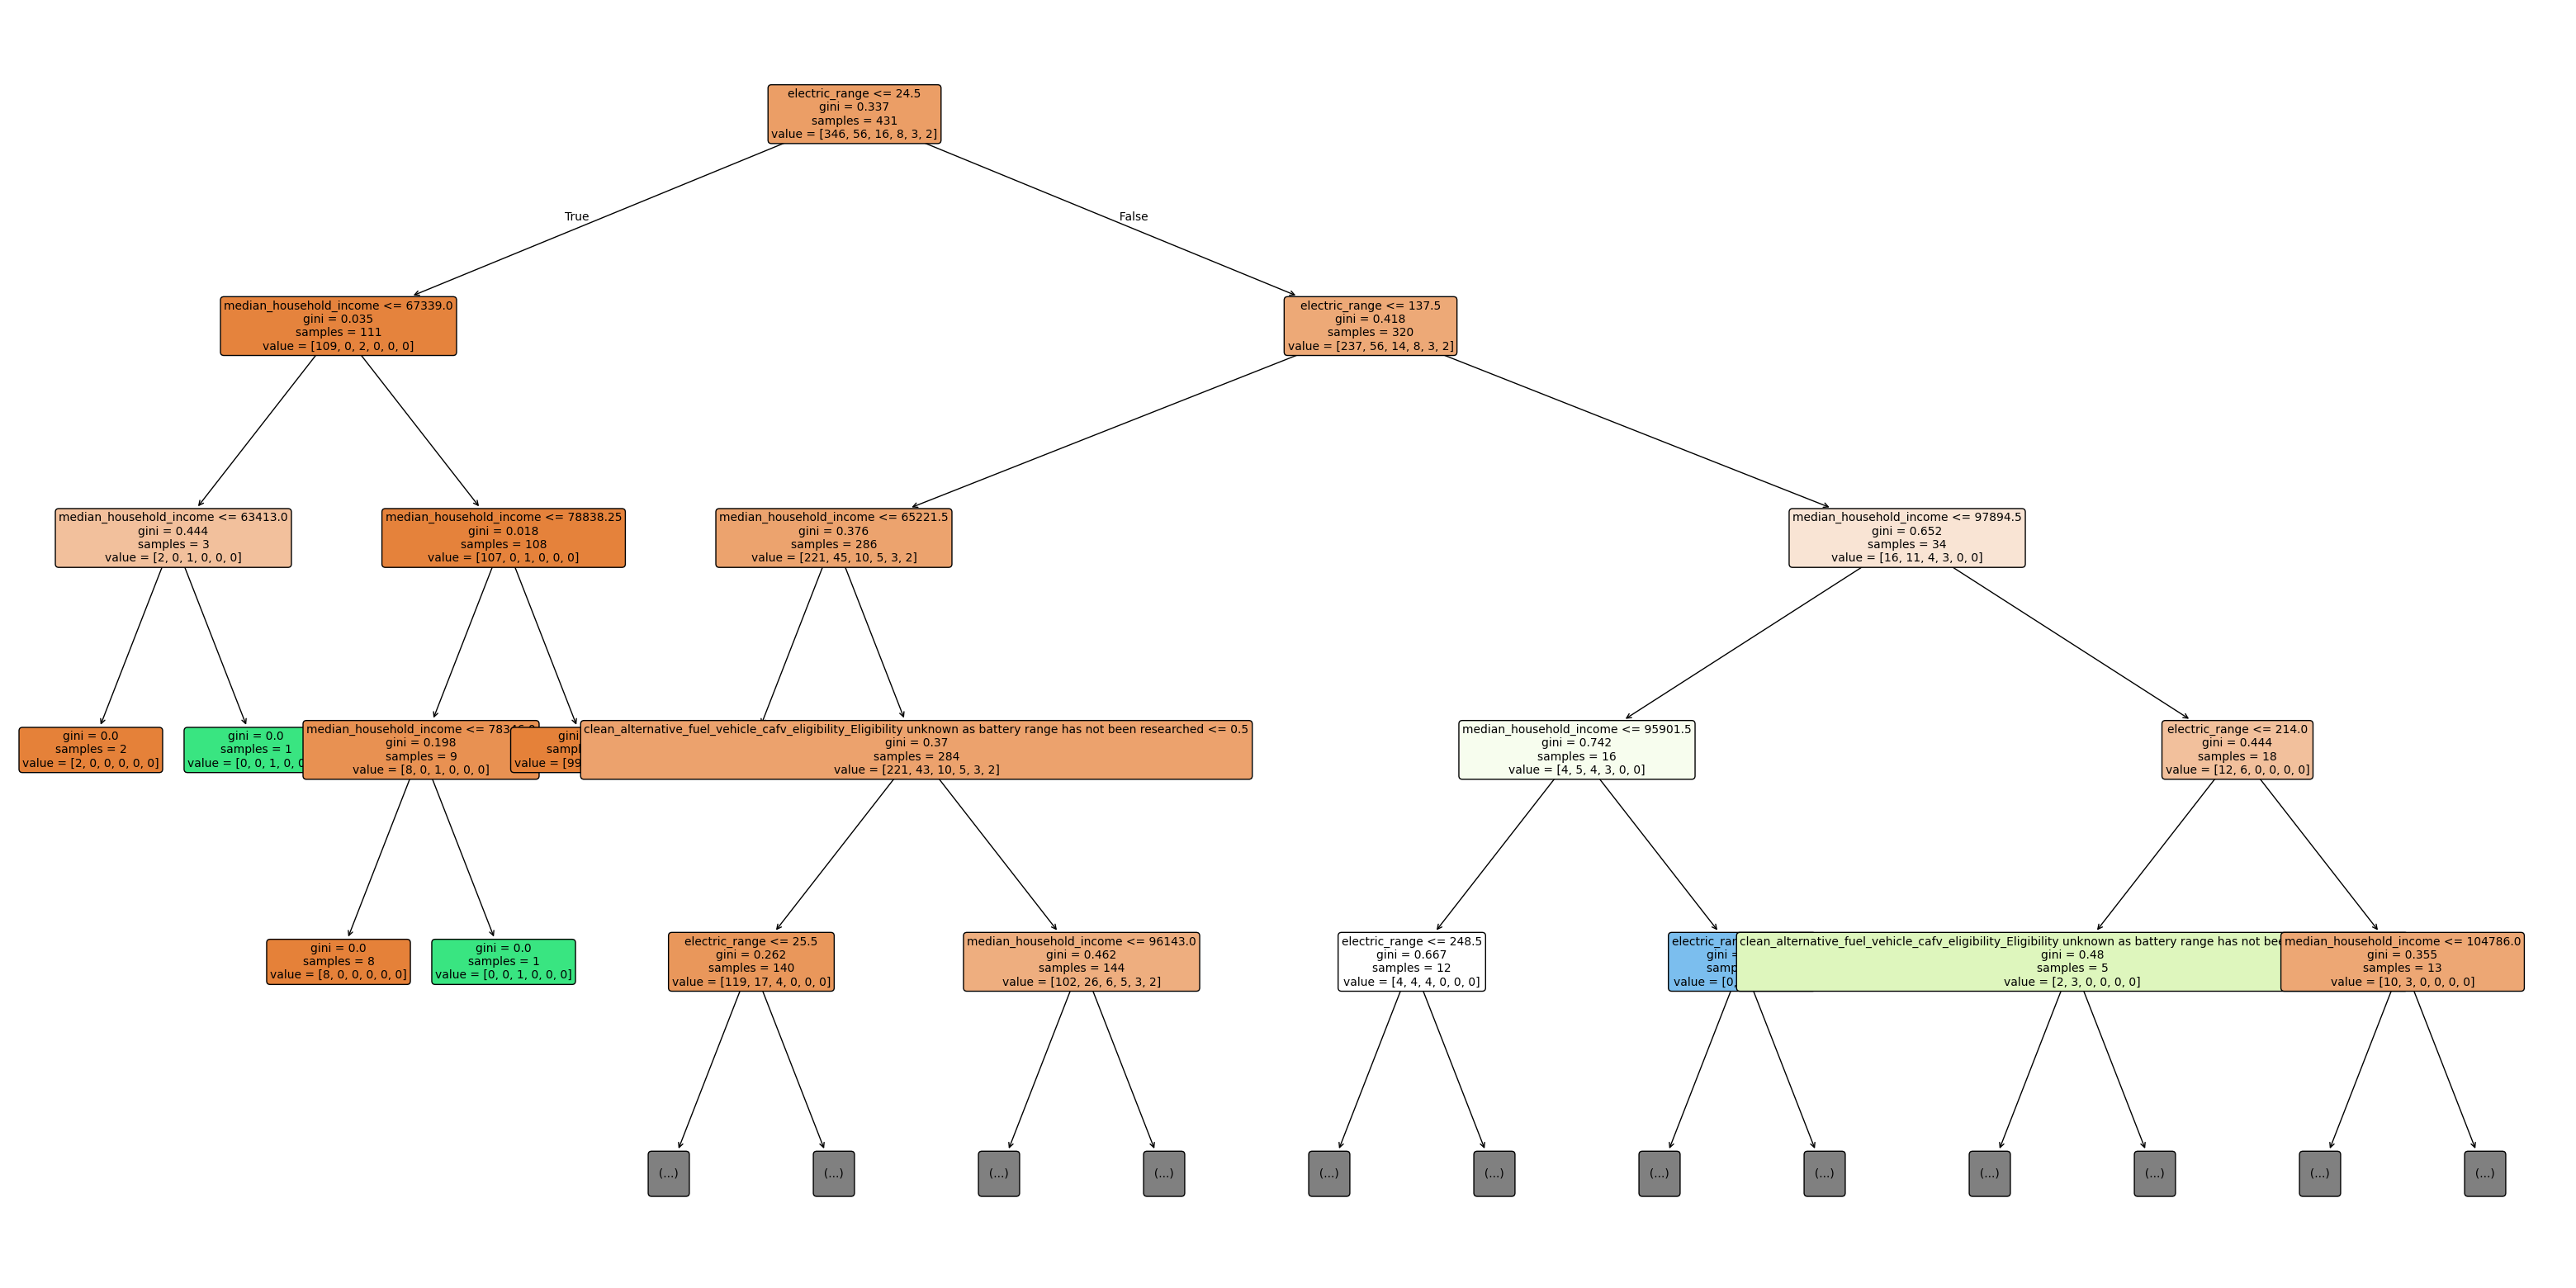

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# ...
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Then plot:
plt.figure(figsize=(40, 20))
plot_tree(
    classifier,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=4
)
plt.show()


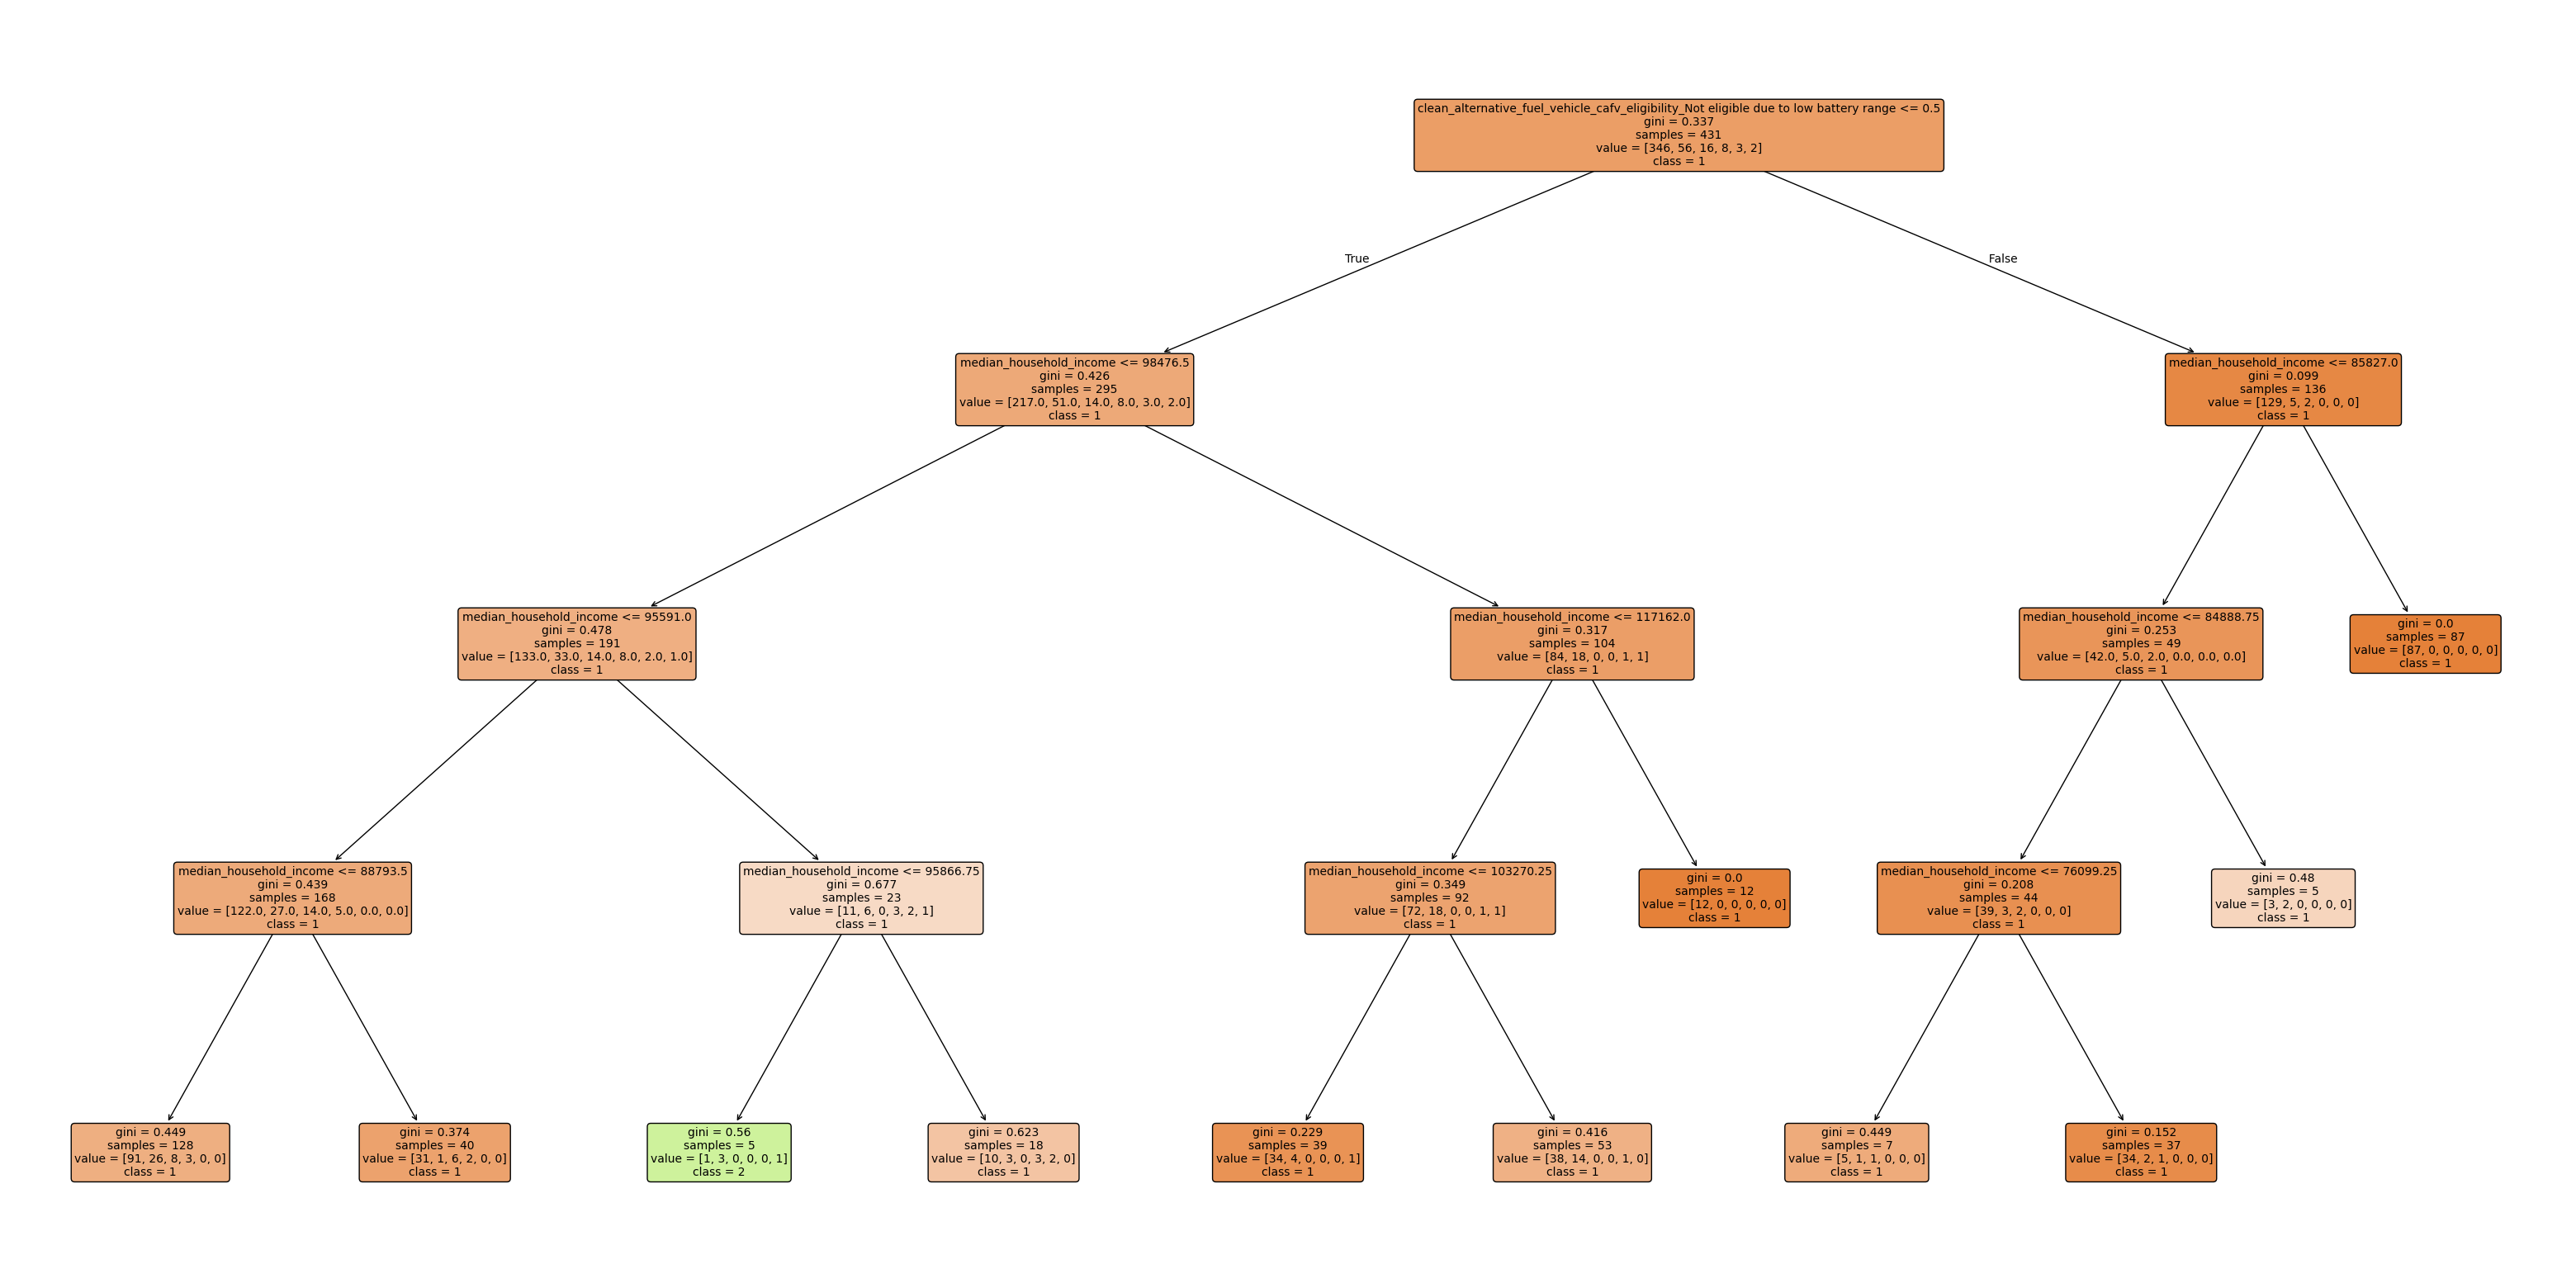

In [ ]:
#import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 1. Create buckets for vehicle_count (if you're doing classification)
bins = [0, 500, 1000, 2000, 5000, 10000, 20000]
labels = [1, 2, 3, 4, 5, 6]
vehicle_income_count['vehicle_count_bucket'] = pd.cut(
    vehicle_income_count['vehicle_n'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# 2. Prepare the data
#    --> Drop the columns you don't want, including 'electric_range'.
X = vehicle_income_count.drop(columns=[
    'vehicle',                 # Possibly your ID or name column
    'vehicle_n',               # The numeric 'vehicle' count (already binned)
    'vehicle_count_bucket',    # The target variable
    'electric_range'           # We remove 'electric_range' as it's not reliable
])

# 3. Convert categorical columns to dummy variables
X = pd.get_dummies(X, drop_first=True)

# 4. Define your target (the newly created buckets)
y = vehicle_income_count['vehicle_count_bucket']

# 5. Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# 6. Fit a Decision Tree Classifier (since we're predicting discrete buckets)
classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=4,          # Just an example to limit tree depth
    min_samples_leaf=5    # Another example hyperparameter
)
classifier.fit(X_train, y_train)

# 7. Plot the tree
plt.figure(figsize=(40, 20))
plot_tree(
    classifier,
    feature_names=X.columns,
    class_names=[str(lbl) for lbl in labels],
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=4
)
plt.show()


# New decision trees --> END !

---



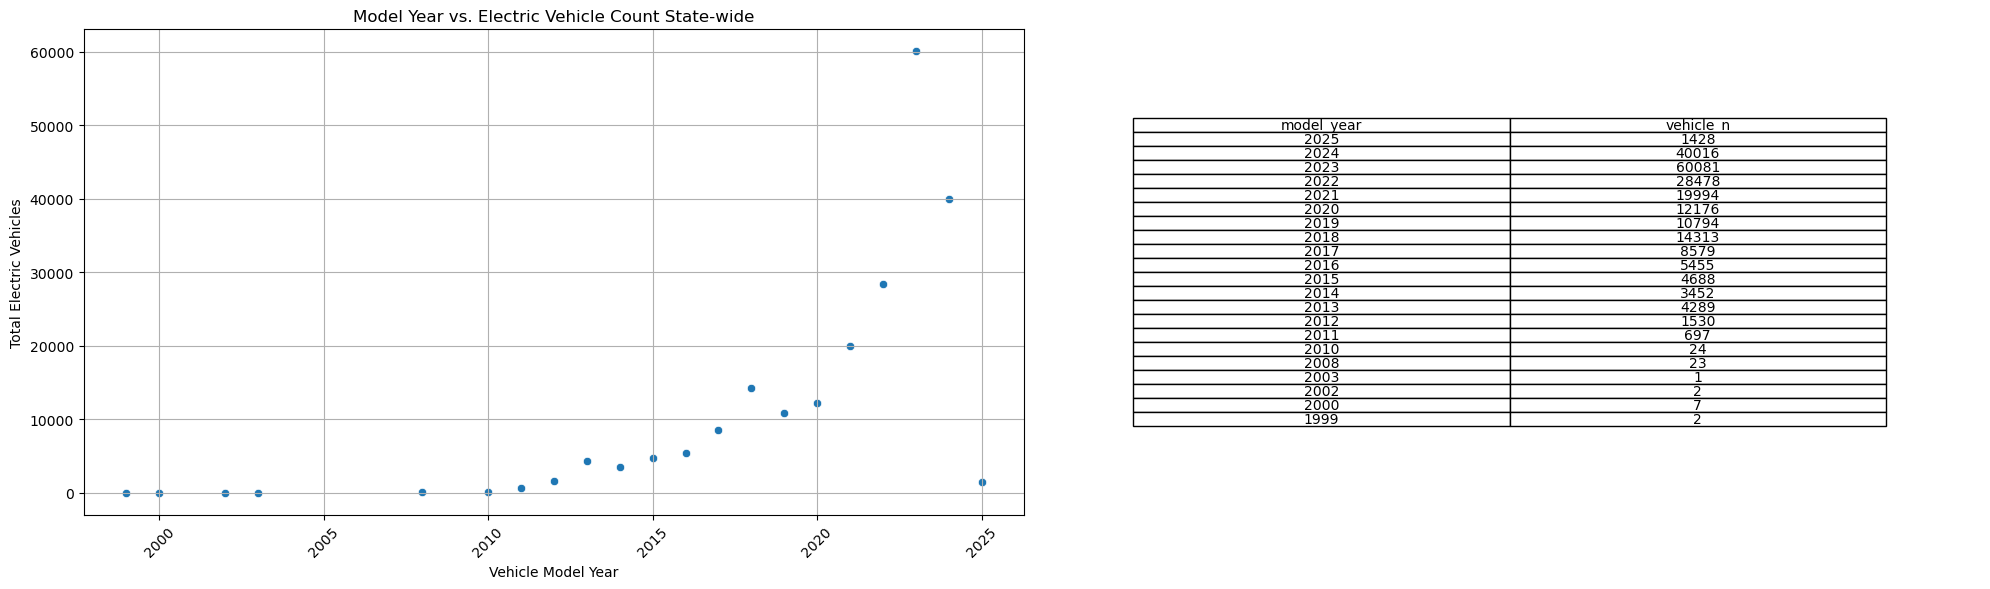

In [ ]:
# Join census dataframe with electric vehicle dataframe. Inner join filters out any non-Washington zips.
electric_vehicle_bill2042 = pd.merge(electric_vehicle_population_clean, census_median_income_clean, left_on='postal_code', right_on='zip_code')

# Group by model year and get total vehicles per year.
electric_vehicle_bill2042_grouped = electric_vehicle_bill2042.groupby('model_year').size().reset_index(name='vehicle_n')

# Join census dataframe with electric vehicle dataframe. Inner join filters out any non-Washington zips.
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Plot
sns.scatterplot(x='model_year', y='vehicle_n', data=electric_vehicle_bill2042_grouped, ax=ax[0])
ax[0].set_title('Model Year vs. Electric Vehicle Count State-wide')
ax[0].set_xlabel('Vehicle Model Year')
ax[0].set_ylabel('Total Electric Vehicles')
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(True)

# Display the list
ax[1].axis('off')
table = ax[1].table(cellText=electric_vehicle_bill2042_grouped.sort_values(by='model_year', ascending=False).values,
                    colLabels=electric_vehicle_bill2042_grouped.columns,
                    cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(0.8, 0.8)

plt.tight_layout()
plt.show()

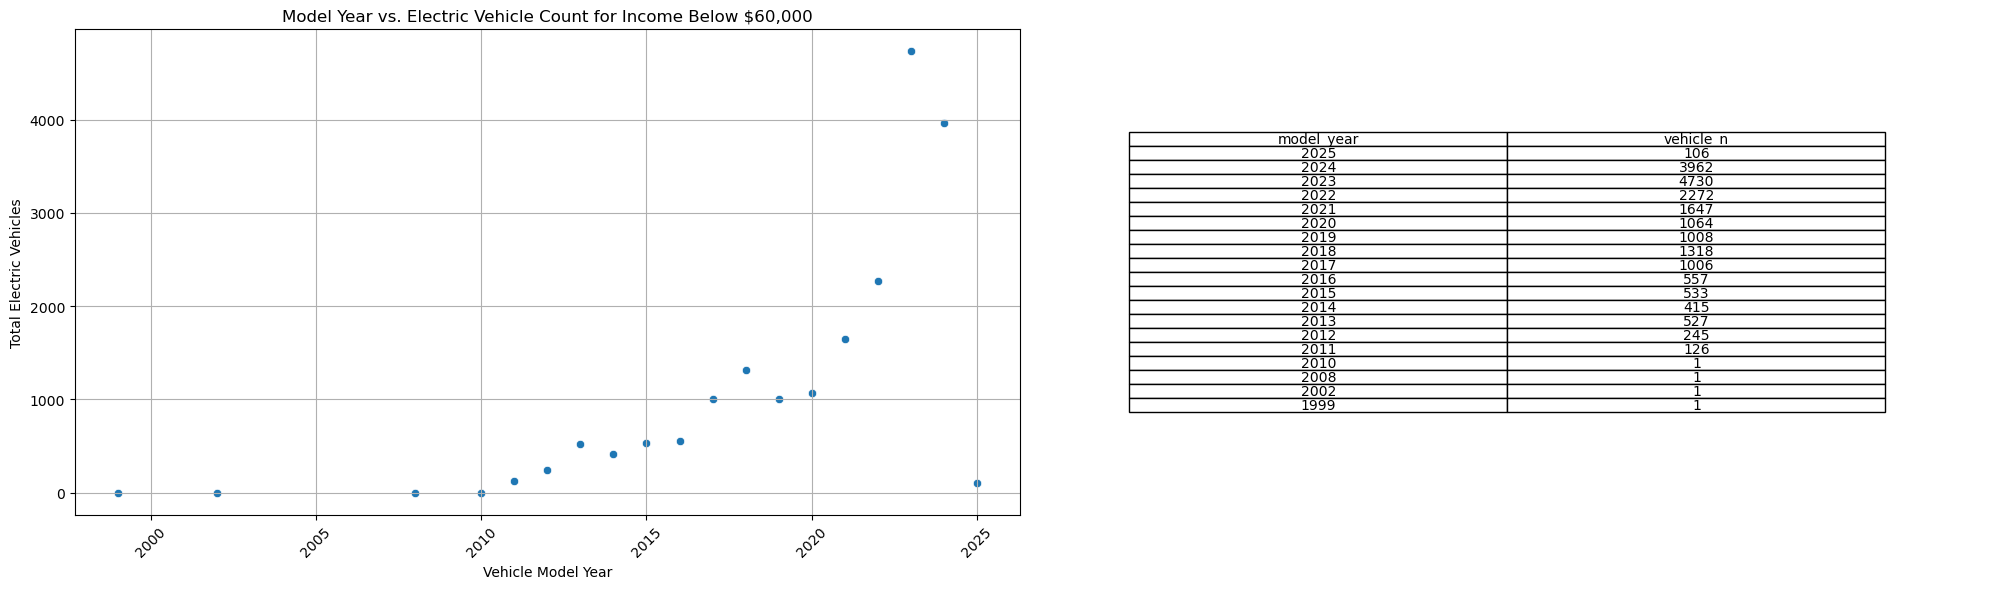

In [ ]:
# Convert median_household_income to numeric
electric_vehicle_bill2042['median_household_income_num'] = pd.to_numeric(electric_vehicle_bill2042['median_household_income'])

# Filter for income below $64,000, then group by model year and get vehicle count
electric_vehicle_bill2042_filter = electric_vehicle_bill2042[electric_vehicle_bill2042['median_household_income_num'] <= 60000]
electric_vehicle_bill2042_filter_grouped = electric_vehicle_bill2042_filter.groupby('model_year').size().reset_index(name='vehicle_n')

# Plot
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

sns.scatterplot(x='model_year', y='vehicle_n', data=electric_vehicle_bill2042_filter_grouped, ax=ax[0])
ax[0].set_title('Model Year vs. Electric Vehicle Count for Income Below $60,000')
ax[0].set_xlabel('Vehicle Model Year')
ax[0].set_ylabel('Total Electric Vehicles')
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(True)

# Display the list
ax[1].axis('off')
table = ax[1].table(cellText=electric_vehicle_bill2042_filter_grouped.sort_values(by='model_year', ascending=False).values,
                    colLabels=electric_vehicle_bill2042_filter_grouped.columns,
                    cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(0.8, 0.8)

plt.tight_layout()
plt.show()

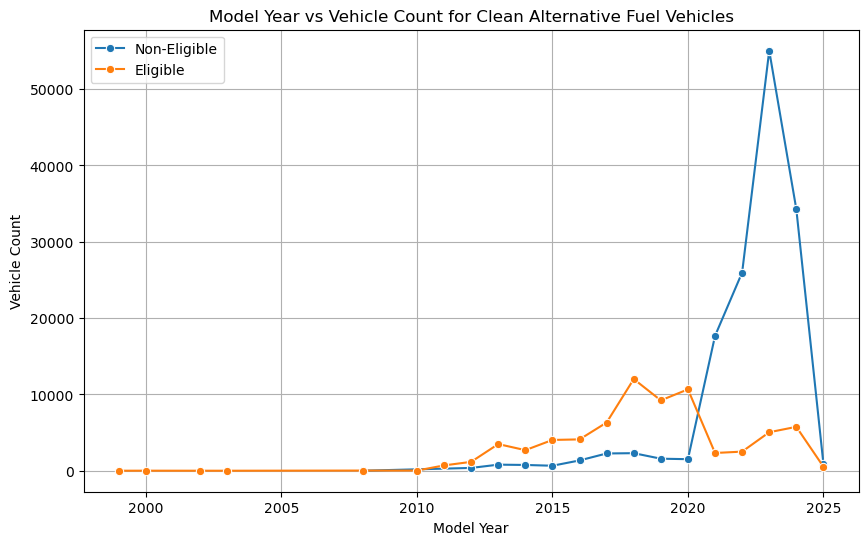

In [ ]:
electric_vehicle_bill2042['clean_alternative_fuel_vehicle_(cafv)_eligibility'] = electric_vehicle_bill2042['clean_alternative_fuel_vehicle_(cafv)_eligibility'].apply(lambda x: 1 if x == 'Clean Alternative Fuel Vehicle Eligible' or x == 1 else 0)

electric_vehicle_bill2042_grouped_eligibility = electric_vehicle_bill2042.groupby(['clean_alternative_fuel_vehicle_(cafv)_eligibility', 'model_year']).size().reset_index(name='vehicle_n')


plt.figure(figsize=(10, 6))
sns.lineplot(data=electric_vehicle_bill2042_grouped_eligibility[electric_vehicle_bill2042_grouped_eligibility['clean_alternative_fuel_vehicle_(cafv)_eligibility'] == 0], x='model_year', y='vehicle_n', marker='o', label='Non-Eligible')
sns.lineplot(data=electric_vehicle_bill2042_grouped_eligibility[electric_vehicle_bill2042_grouped_eligibility['clean_alternative_fuel_vehicle_(cafv)_eligibility'] == 1], x='model_year', y='vehicle_n', marker='o', label='Eligible')
plt.title('Model Year vs Vehicle Count for Clean Alternative Fuel Vehicles')
plt.xlabel('Model Year')
plt.ylabel('Vehicle Count')
plt.legend()
plt.grid(True)
plt.show()
